In [ ]:
pip install pandas

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [ ]:
df=pd.read_csv("Heart.csv")

In [ ]:
df.head()
df.tail()


,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes
302,303,38,1,nonanginal,138,175,0,0,173,0,0.0,1,NaN,normal,No


In [ ]:
df.shape


(303, 15)

In [ ]:
df.dtypes

,0
Unnamed: 0,int64
Age,int64
Sex,int64
ChestPain,object
RestBP,int64
Chol,int64
Fbs,int64
RestECG,int64
MaxHR,int64
ExAng,int64


In [ ]:
df.isnull()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()


,0
Unnamed: 0,0
Age,0
Sex,0
ChestPain,0
RestBP,0
Chol,0
Fbs,0
RestECG,0
MaxHR,0
ExAng,0


In [ ]:
df.count()

,0
Unnamed: 0,303
Age,303
Sex,303
ChestPain,303
RestBP,303
Chol,303
Fbs,303
RestECG,303
MaxHR,303
ExAng,303


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [ ]:
df.dtypes

,0
Unnamed: 0,int64
Age,int64
Sex,int64
ChestPain,object
RestBP,int64
Chol,int64
Fbs,int64
RestECG,int64
MaxHR,int64
ExAng,int64


In [ ]:
#df == 0
(df==0).sum()

,0
Unnamed: 0,0
Age,0
Sex,97
ChestPain,0
RestBP,0
Chol,0
Fbs,258
RestECG,151
MaxHR,0
ExAng,204


In [ ]:
df[df==0]

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN
4,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN
299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
300,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
df[df==0].count()

,0
Unnamed: 0,0
Age,0
Sex,97
ChestPain,0
RestBP,0
Chol,0
Fbs,258
RestECG,151
MaxHR,0
ExAng,204


In [ ]:
df['Age'].mean()

54.43894389438944

In [ ]:
new_df=df[["Age", "Sex", "ChestPain", "RestBP", "Chol"]]

In [ ]:
new_df

,Age,Sex,ChestPain,RestBP,Chol
0,63,1,typical,145,233
1,67,1,asymptomatic,160,286
2,67,1,asymptomatic,120,229
3,37,1,nonanginal,130,250
4,41,0,nontypical,130,204
...,...,...,...,...,...
298,45,1,typical,110,264
299,68,1,asymptomatic,144,193
300,57,1,asymptomatic,130,131
301,57,0,nontypical,130,236


In [ ]:
train, test = train_test_split(new_df,random_state=0, test_size=0.25)

In [ ]:
train.shape


(227, 5)

In [ ]:
test.shape

(76, 5)

In [ ]:
actual = np.concatenate((np.ones(45), np.zeros(450), np.ones(5)))

In [ ]:
actual

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
predicted = np.concatenate((np.ones(100), np.zeros(400)))

In [ ]:
predicted

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

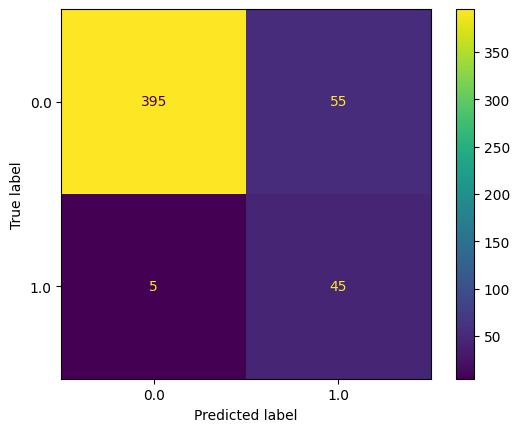

In [ ]:
ConfusionMatrixDisplay.from_predictions(actual,predicted)

TN  .|. FP  
..............

FN .|. TP  


FP TYPE 1 ERROR

FN TYPE 2 ERROR


**TP**
True positive, the number of positive examples that were correctly classified

**TN**

True negative, the number of negative examples that were correctly classified

**FP**

False positive, the number of negative examples that were incorrectly classified as positive

**FN**

False negative, the number of positive examples that were incorrectly classified as negative

In [ ]:
print(classification_report(actual, predicted))

              precision    recall  f1-score   support

         0.0       0.99      0.88      0.93       450
         1.0       0.45      0.90      0.60        50

    accuracy                           0.88       500
   macro avg       0.72      0.89      0.76       500
weighted avg       0.93      0.88      0.90       500



In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print("Accuracy Score:", accuracy_score(actual, predicted))

Accuracy Score: 0.88


**Accuracy**

Accuracy is the overall correctness of the model across all classes, measuring the proportion of true results (both true positives and true negatives) out of all predictions.

Calculated as the sum of true positives and true negatives divided by the total number of samples.

**Precision**

Precision measures how many of the positive predictions made by the model are actually correct.
Calculated as the number of true positives divided by the sum of true positives and false positives.

**Recall**

Recall measures how many of the actual positives were correctly identified by the model.

Calculated as the number of true positives divided by the sum of true positives and false negatives.

**F1 Score**

The F1-score is the harmonic mean of precision and recall. It balances the two metrics, offering a single performance metric when you want to find a compromise between precision and recall.

Calculated as 2 * (Precision * Recall) / (Precision + Recall).